In [1]:
from gensim.models import Word2Vec
model = Word2Vec.load("hotel.model")

In [3]:
model.wv.most_similar("친절")

/home/jahn/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('상냥', 0.7205257415771484),
 ('친', 0.6082935929298401),
 ('철', 0.6069833040237427),
 ('직원', 0.5970836877822876),
 ('다정', 0.5839581489562988),
 ('친절히', 0.5703033208847046),
 ('착하', 0.5552977323532104),
 ('깨끗', 0.5452924966812134),
 ('깔끔', 0.5384696125984192),
 ('응대', 0.5216952562332153)]

In [4]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
import pandas as pd
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:500,:])
# X_tsne = tsne.fit_transform(X)

/home/jahn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3823
[-0.6037866  -0.13781372 -0.8197697  -0.08567528  0.15416142 -0.8913437
 -0.7660615  -0.3554943  -0.03571768 -0.38399455]


In [6]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x','y'])
df.shape

(100, 2)

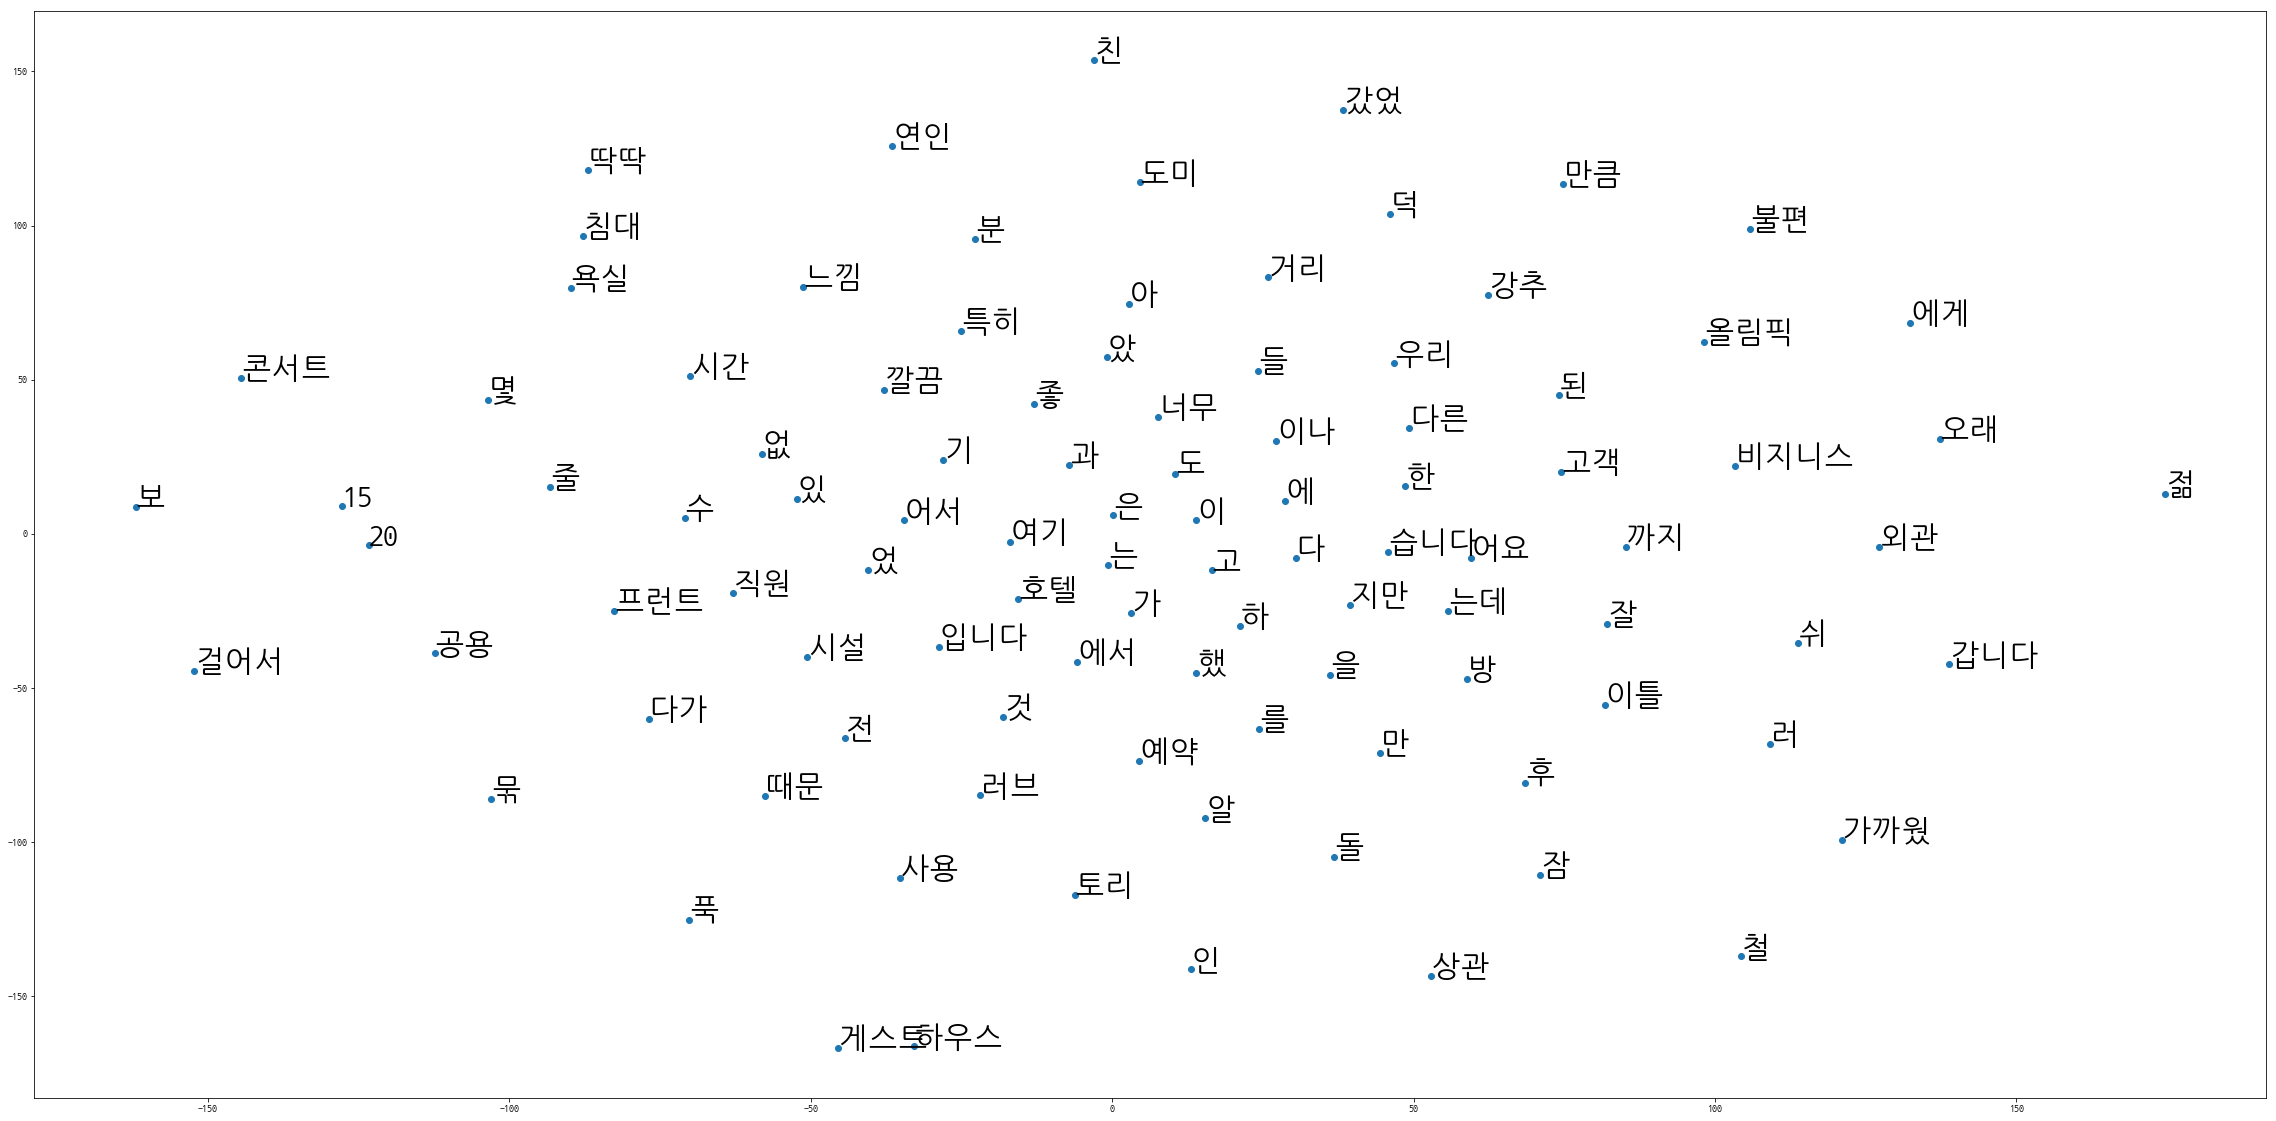

In [7]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()